In [40]:
import matplotlib.pyplot as plt
import numpy as np

In [41]:
ms=10**7
mp=10**4
ma=1
G=1
R=20

xs=0
ys=0
xp=20

rs=np.array((0,0))
rp=np.array((20,0))

In [42]:
rcm=(rp*mp+rs*ms)/(ms+mp)
shift=-rcm

In [43]:
rs=rs+shift
rp=rp+shift
xs=rs[0]
ys=rs[1]
xp=rp[0]
yp=rp[1]

In [44]:
t = 0
tMax = 10.0
dt   = 0.001;
n    = tMax / dt
pi=np.pi

In [45]:
xts = []
yts = []
xtp = []
ytp = []
xta = []
yta = []

vxy = []
vyt = []
kints = []
potts = []
ets = []
tts = []
kintp = []
pottp = []
etp = []
ttp = []
kinta = []
potta = []
eta = []
tta = []

In [46]:
xa=R*np.cos(np.pi/4)
ya=R*np.sin(np.pi/4)
ra=[xa,ya]

In [47]:
w=(G*(Ms+Mp)/R**3)**(1/2)

vsScaler=(w*np.abs(xs))
vpScaler=(w*xp)

vax = -vpScaler*np.cos(pi/4)
vay = vpScaler*np.sin(pi/4)
va  = np.array((vax, vay))

vsx=0
vsy=-vsScaler

vpx=0
vpy=vpScaler

vs=np.array((vsx,vsy))
vp=np.array((vpx,vpy))
#Va=np.array(Vax,Vay)

In [54]:
def KeplerODE(t,y):
    global mp,ms,G

    rs = y[0:2]
    vs = y[2:4]
    rp = y[4:6]
    vp = y[6:8]
    ra = y[8:10]
    va = y[10:12]

    drdts = vs
    drdtp = vp
    drdta = va
    
    rsp=rs-rp
    rps=rp-rs
    rsa=rs-ra
    ras=ra-rs
    rpa=rp-ra
    rap=ra-rp    

    Fs    = - ms * mp * G / np.linalg.norm(rs)**3 * rs
    a_s    = Fs / mp
    dvdts = a_s
    
    Fp    = - ms * mp * G / np.linalg.norm(rp)**3 * rp
    ap    = Fp / mp
    dvdtp = ap
    
    Fa    = - ms * mp * G / np.linalg.norm(ra)**3 * ra
    aa    = Fa / mp
    dvdta = aa
    
    S = np.concatenate((drdts,dvdts))
    A = np.concatenate((drdta,dvdta))
    P = np.concatenate((drdtp,dvdtp)) 
    
    return np.concatenate((S,P,A))

In [55]:
y = np.concatenate((rs,vs,rp,vp,ra,va))
while (t<tMax):
    rs = y[0:2]
    vs = y[2:4]
    rp = y[4:6]
    vp = y[6:8]
    ra = y[8:10]
    va = y[10:12]

    kins = 1.0/2.0*ms* np.linalg.norm(vs)**2
    pots = -mp*ms*G / np.linalg.norm(rs)
    es   = kins+pots
    
    kinp = 1.0/2.0*mp* np.linalg.norm(vp)**2
    potp = -mp*ms*G / np.linalg.norm(rp)
    ep   = kinp+potp
    
    kina = 1.0/2.0*ma* np.linalg.norm(va)**2
    pota = -mp*ms*G / np.linalg.norm(ra)
    ea   = kina+pota
    #if (t==0.0):
    #    e0 = e
    #print(t,e,e0,e-e0)
    
    xts.append(rs[0])
    yts.append(rs[1])
    kints.append(kins)
    potts.append(pots)
    ets.append(es)
    tts.append(t)

    xtp.append(rp[0])
    ytp.append(rp[1])
    kintp.append(kinp)
    pottp.append(potp)
    etp.append(ep)
    ttp.append(t)
    
    xta.append(ra[0])
    yta.append(ra[1])
    kinta.append(kina)
    potta.append(pota)
    eta.append(ea)
    tta.append(t)
    
    #dydt = KeplerODE(t,y)
    #y = y + dydt*dt    

    f1 = KeplerODE(t       ,y          )
    f2 = KeplerODE(t+dt/2.0,y+f1*dt/2.0)
    f3 = KeplerODE(t+dt/2.0,y+f2*dt/2.0)
    f4 = KeplerODE(t+dt    ,y+f3*dt    )

    y = y + (f1 + 2.0*f2 + 2.0*f3 + f4) / 6.0 * dt
    t = t + dt


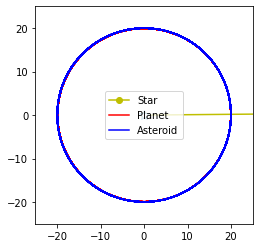

In [60]:
plt.plot(xts,yts,'yo-',label='Star')
plt.plot(xtp,ytp,'r-',label='Planet')
plt.plot(xta,yta,'b-',label='Asteroid')
plt.plot(0,0,'*',mfc='w',ms=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-25,25)
plt.ylim(-25,25)
plt.legend()
plt.show()

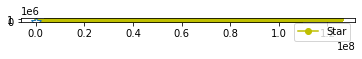

In [57]:
plt.plot(xts,yts,'yo-',label='Star')
plt.plot(0,0,'*',mfc='w',ms=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

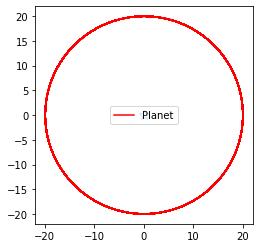

In [58]:
plt.plot(xtp,ytp,'r-',label='Planet')
plt.plot(0,0,'*',mfc='w',ms=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

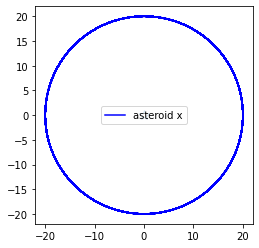

In [59]:
plt.plot(xta,yta,'b-',label='asteroid x')
plt.plot(0,0,'*',mfc='w',ms=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

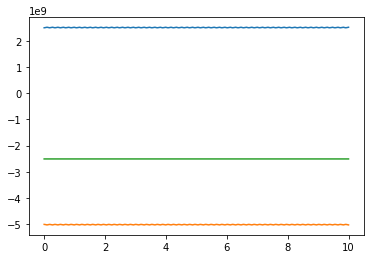

In [62]:
plt.plot(ttp,kintp,ttp,pottp,ttp,etp);

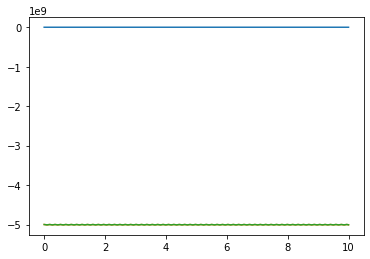

In [63]:
plt.plot(tta,kinta,tta,potta,tta,eta);